<a href="https://colab.research.google.com/github/Anagefilho/4imersao_dados_alura/blob/main/Trabalho_2_I_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Material de apoio
https://neylsoncrepalde.github.io/2016-10-09-redes-no-python-com-networkx/
https://igraph.readthedocs.io/en/stable/api/index.html
https://github.com/resendevinicius/CXN-MLL/blob/main/src/graphutils.py
https://towardsdatascience.com/using-complex-networks-to-improve-machine-learning-methods-fe2c034f6de3
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://tnanukem.github.io/scikit-net/develop/getting_started/transforming_data.html


In [ ]:
pip install python-igraph

#Primeiro método de transformação do gráfico e valores do mesmo

In [ ]:
import igraph as ig
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy
0
from igraph import *
from scipy.signal import savgol_filter
from sklearn.metrics import classification_report
from sklearn.metrics import euclidean_distances
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import normalize
from sklearn.datasets import load_iris
from sknet.network_construction import KNNEpislonRadiusConstructor
from sknet.network_construction import KNNConstructor
from sknet.supervised import HighLevelClassifier

def PageRank(graph):
    return ig.Graph.pagerank(graph)

def graphgen(k, X, y):
    euclidean_dist = euclidean_distances(X)
    np.fill_diagonal(euclidean_dist, np.inf)
    ind_ranking = np.argsort(euclidean_dist, axis=1)[:, :k]
    mask = np.zeros((len(X), k)).astype(int)

    for i in range(len(ind_ranking)):
        mask[i] = (y[ind_ranking[i]] == y[i])

    links = mask.nonzero()
    sources = links[0]
    targets = ind_ranking[links]
    dists = euclidean_dist[sources, targets]

    graph = ig.Graph(len(X), list(zip(sources.astype(int), targets.astype(int))), directed=True,
                     edge_attrs={"weight": dists})
    return graph
    
def sample_smoothing_differentiation_normalization(X):
    X_sav = savgol_filter(X, 25, 4, 2, axis=1)
    return X_sav / (np.linalg.norm(X_sav, 2, axis=1).reshape(-1, 1))

def sample_amida1_normalization(X, amida1_ids):
    return X / (np.max(X[:, amida1_ids], axis=1).reshape(-1, 1)) #Perguntar sobre o reshape 
    
def load_ftir_data(filename):
    data = np.loadtxt(filename)
    return data[:,:-1], data[:,-1].astype(int)

def alg(dataset):
    X, y = load_ftir_data(dataset)
    X = normalize(X)
    outer_rskfcv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=np.random.seed(11))
    for train_ids, test_ids in outer_rskfcv.split(X, y):
        graph_train = graphgen(3, X[train_ids], y[train_ids])
    return graph_train

In [ ]:
g = alg('/content/covid19_dataset_Maranhao200.dat')
#
#Criação da rede complexa utilizando métodos que a Janayna me mandou.

In [ ]:
g.assortativity?

In [ ]:
print("Number of vertices in the graph:", g.vcount())
print("Number of edges in the graph", g.ecount())
print("Is the graph directed:", g.is_directed())
print("Maximum degree in the graph:", g.maxdegree())

print("Degrees in the graph:", g.degree())
print("transitividade in the graph:", g.transitivity_undirected())

print("Assortativity of the graph:", g.assortativity_degree())
print("Diameter:", g.diameter())
#Pega todos os caminhos para o vértice X. 
print("All shortest path : ", g.get_all_shortest_paths(20, to=None, weights=None, mode='out'))
#Graph.knn() computes the average degree of the neighbors.

print("Average degree of the neighbors:", g.knn())
print(g.bfs(0))
#Busca em largura
print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

Number of vertices in the graph: 180
Number of edges in the graph 265
Is the graph directed: True
Maximum degree in the graph: 9
Degrees in the graph: [1, 2, 0, 3, 3, 0, 4, 1, 5, 2, 4, 4, 0, 1, 4, 6, 1, 7, 3, 4, 1, 0, 5, 6, 4, 3, 1, 2, 1, 4, 3, 4, 2, 2, 1, 2, 3, 2, 2, 3, 8, 5, 2, 3, 0, 2, 1, 4, 1, 1, 3, 4, 3, 1, 1, 4, 6, 4, 4, 3, 2, 2, 1, 5, 3, 1, 6, 4, 4, 2, 1, 2, 3, 2, 1, 5, 4, 3, 3, 4, 2, 6, 3, 3, 2, 3, 2, 3, 2, 2, 3, 4, 3, 2, 2, 6, 1, 5, 3, 4, 4, 0, 1, 3, 7, 5, 4, 3, 5, 0, 1, 6, 3, 5, 6, 0, 2, 1, 2, 2, 0, 2, 2, 4, 2, 3, 1, 3, 0, 3, 5, 4, 4, 2, 5, 9, 3, 3, 0, 1, 5, 1, 7, 2, 3, 1, 3, 3, 6, 2, 8, 2, 1, 5, 2, 2, 2, 3, 4, 5, 3, 1, 2, 5, 0, 1, 2, 1, 3, 4, 4, 3, 7, 3, 2, 8, 3, 6, 2, 2]
transitividade in the graph: 0.23076923076923078
Assortativity of the graph: 0.07220102697837232
Diameter: 10
All shortest path :  [[20, 32, 89, 59, 7], [20], [20, 32], [20, 32, 89, 59, 53], [20, 32, 89, 59], [20, 32, 89]]
Average degree of the neighbors: ([3.0, 1.5, nan, 5.0, 2.3333333333333335, nan, 2.25,

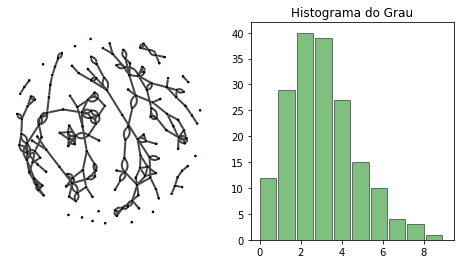

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

ig.plot(g, target=axs[0])

plt.hist(g.degree(),align='mid', width=0.8, edgecolor='black', color='green', alpha=.5)
plt.title('Histograma do Grau')
plt.show()

#Segundo maneira de construir utilizando SKnet e também fazendo avaliação da rede.

In [ ]:
wavsname="/content/wavenumbers.dat" 
filename="/content/covid19_dataset_Maranhao200.dat"

X, y = load_ftir_data(filename)
wavs = np.loadtxt(wavsname)

amida1_ids = np.where(np.logical_and(wavs>=1630, wavs<=1660))[0]

g = alg(filename)

In [ ]:
#Transformar dado tabelado em rede complexa/grafo.
ke_c = KNNEpislonRadiusConstructor(k=3, epsilon=0.3)
ke_c.fit(X, y)
G = ke_c.transform()

#Treinamento dos dados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25)
knn_c = KNNConstructor(k=2)
classifier = HighLevelClassifier()
classifier.fit(X_train, y_train, constructor=knn_c)
pred = classifier.predict(X_test)

50it [00:02, 17.29it/s]


#Avaliação dos dados sem normalização (Amida 1 e Sav golay)

In [ ]:
cm = confusion_matrix(y_test, pred)
#por algum motivo a matriz de confusão ficou com uma linha e coluna extra
cm = numpy.delete(cm, 1, 0)
cm = numpy.delete(cm, 0, 1)

print('Matriz de confusão:\n', cm)

print('\nAcurácia: ', np.sum(np.diagonal(cm))/np.sum(cm))
print("Sensibilidade: ",cm[1,1]/np.sum(cm[1]))
print("Especificidade:", cm[0,0]/np.sum(cm[0]))

Matriz de confusão:
 [[11 12]
 [13 14]]

Acurácia:  0.5
Sensibilidade:  0.5185185185185185
Especificidade: 0.4782608695652174


#Aplicando normalização

In [ ]:
#Normalizando os dados:
X, y = load_ftir_data(filename)

amida1_ids = np.where(np.logical_and(wavs>=1630, wavs<=1660))[0]

X = sample_amida1_normalization(X, amida1_ids)
X = sample_smoothing_differentiation_normalization(X)

#Treinamento e avaliação dos dados normalizados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25)
knn_c = KNNConstructor(k=5)
classifier = HighLevelClassifier()
classifier.fit(X_train, y_train, constructor=knn_c)
pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, pred)
cm = numpy.delete(cm, 1, 0)
cm = numpy.delete(cm, 0, 1)

print('\n Matriz de confusão:\n', cm)

print('\nAcurácia: ', np.sum(np.diagonal(cm))/np.sum(cm))
print("Sensibilidade: ",cm[1,1]/np.sum(cm[1]))
print("Especificidade:", cm[0,0]/np.sum(cm[0]))

50it [00:03, 12.67it/s]

Matriz de confusão:
 [[15 12]
 [ 6 17]]

Acurácia:  0.64
Sensibilidade:  0.7391304347826086
Especificidade: 0.5555555555555556
